In [1]:
%pip install pandas
%pip install numpy
import pandas as pd
import numpy as np

file_path = 'C:\\Users\\dell\Desktop\\twitter.csv'
df = pd.read_csv(file_path)

display(df.head())
display(df.info())
display(df.isnull().sum())


<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
C:\Users\dell\AppData\Local\Temp\ipykernel_3412\355003479.py:6: SyntaxWarning: invalid escape sequence '\D'
  file_path = 'C:\\Users\\dell\Desktop\\twitter.csv'


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75681 entries, 0 to 75680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   75681 non-null  int64 
 1   Borderlands                                            75681 non-null  object
 2   Positive                                               75681 non-null  object
 3   im getting on borderlands and i will murder you all ,  74995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


None

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [2]:

import pandas as pd

file_path = r'C:\Users\dell\Desktop\twitter.csv'

df = pd.read_csv(file_path)
print("Original column names:", df.columns)
print("Number of columns:", df.shape[1])

if df.shape[1] == 4:
    df.columns = ['id', 'topic', 'sentiment', 'text']  
else:
    print("Mismatch in expected number of columns. Please check the data.")
print(df.head())



Original column names: Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')
Number of columns: 4
     id        topic sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  


In [ ]:
df.columns = ['id', 'topic', 'sentiment', 'text'] 

df['text'] = df['text'].fillna('')
df['text'] = df['text'].str.replace(r'http\S+|www\S+|https\S+', '', regex=True)
df['text'] = df['text'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True) 
df['text'] = df['text'].str.lower()  
print("Cleaned DataFrame:")
print(df.head())



Cleaned DataFrame:
     id        topic sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  i am coming to the borders and i will kill you...  
1  im getting on borderlands and i will kill you all  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  


In [11]:
%pip install pandas nltk scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

try:
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('wordnet')
except Exception as e:
    print("Error downloading NLTK resources:", e)
    

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
file_path = r'C:\Users\dell\Desktop\twitter.csv'
df = pd.read_csv(file_path)

df.columns = ['id', 'topic', 'sentiment', 'text']

In [6]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

file_path = r'C:\Users\dell\Desktop\twitter.csv'
df = pd.read_csv(file_path)

def preprocess_text(text, use_stemming=True):
    if pd.isna(text):  
        return ""
    
    tokens = word_tokenize(text)
    processed_tokens = []
    for token in tokens:
        if token not in stop_words:
            if use_stemming:
                processed_tokens.append(stemmer.stem(token))
            else:
                processed_tokens.append(lemmatizer.lemmatize(token))
    return ' '.join(processed_tokens)

try:
    df['processed_text'] = df['text'].apply(lambda x: preprocess_text(x, use_stemming=True))
except Exception as e:
    print(f"Error during preprocessing: {e}")
    print("Columns in DataFrame:", df.columns)  

try:
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
    print("\nTF-IDF Matrix:")
    print(tfidf_df.head())
except KeyError as e:
    print(f"KeyError: {e} - 'processed_text' column may not exist.")


    



Error during preprocessing: 'text'
Columns in DataFrame: Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')
KeyError: 'processed_text' - 'processed_text' column may not exist.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/bf/a0/b8fa5f2d7147a7675e2cab99108f7d8d524b67481f81f289cdb2b64ed1ab/wordcloud-1.9.3-cp312-cp312-win_amd64.whl.metadata
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 330.3 kB/s eta 0:00:01
   --------------------- ------------------ 163.8/301.4 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


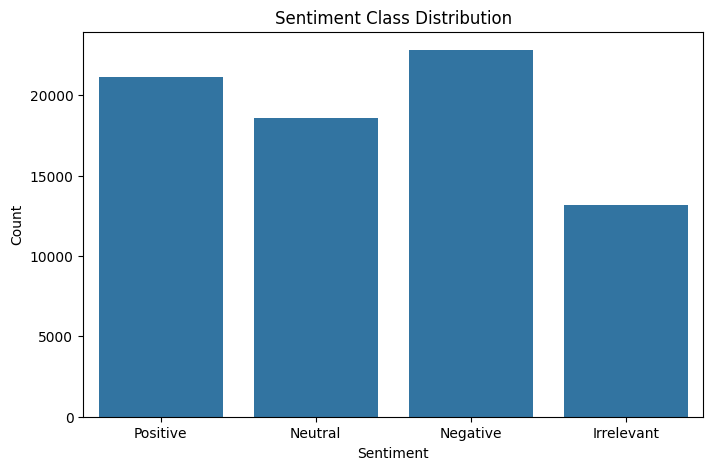

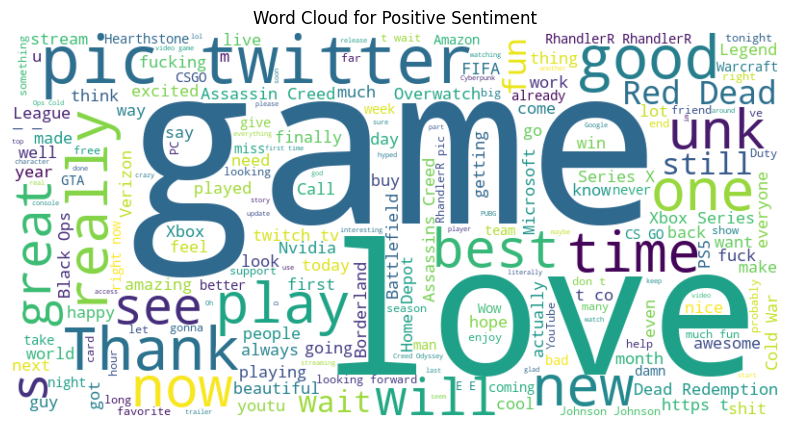

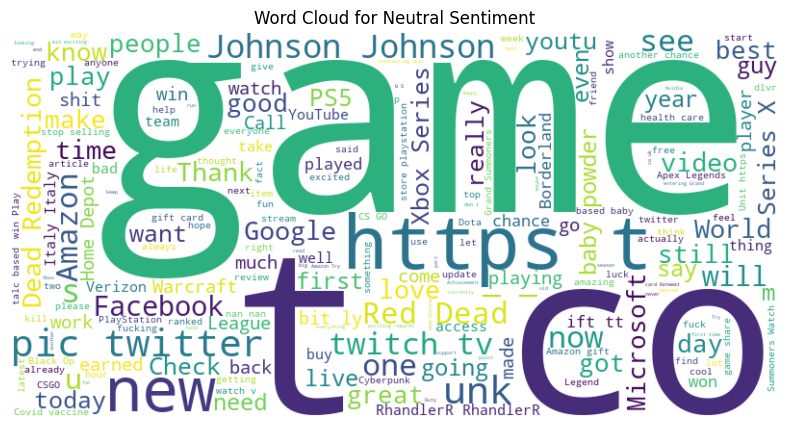

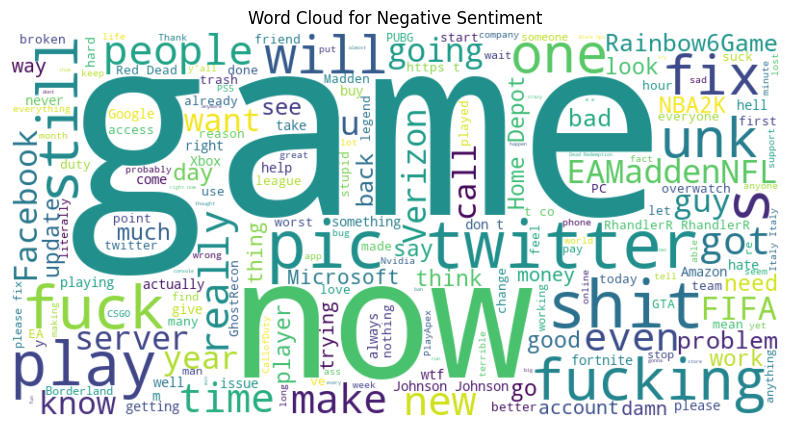

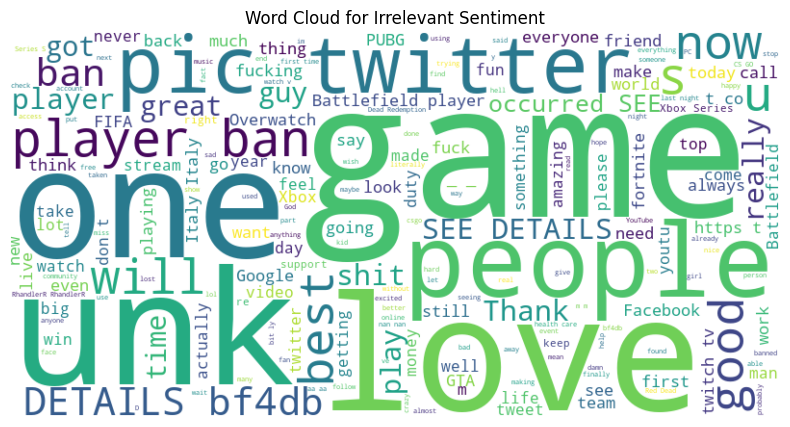

In [4]:
import pandas as pd
%pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt
%pip install wordcloud

from wordcloud import WordCloud

df = pd.read_csv(r'C:\Users\dell\Desktop\twitter.csv')

df.columns = ['id', 'topic', 'sentiment', 'text']

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment')
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

for sentiment in df['sentiment'].unique():

    text_data = ' '.join(df[df['sentiment'] == sentiment]['text'].astype(str))
    
   
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
    

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment} Sentiment")
    plt.show()



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


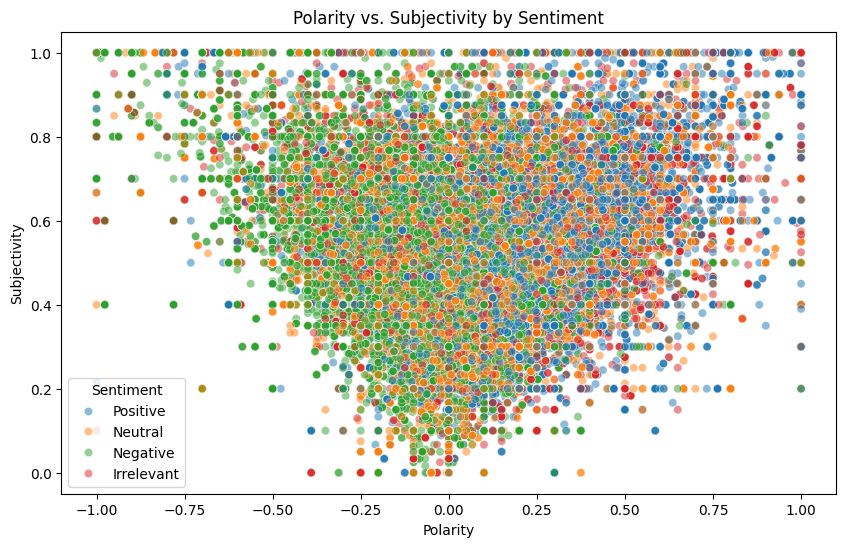

In [7]:

%pip install textblob
from textblob import TextBlob

df['text'] = df['text'].astype(str)


df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='polarity', y='subjectivity', hue='sentiment', alpha=0.5)
plt.title("Polarity vs. Subjectivity by Sentiment")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.legend(title="Sentiment")
plt.show()


In [ ]:
import pandas as pd
file_path = r'C:\Users\dell\Desktop\twitter.csv'
df = pd.read_csv(file_path)
missing_values = df.isna().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64


In [19]:
import pandas as pd

file_path = r'C:\Users\dell\Desktop\twitter.csv'
df = pd.read_csv(file_path)

df = df.dropna()
if df.shape[0] > 0:
    print("Data is present. Number of rows:", df.shape[0])
else:
    print("No data left after dropping rows with missing values.")


Data is present. Number of rows: 74995


In [20]:
import pandas as pd

file_path = r'C:\Users\dell\Desktop\twitter.csv'
df = pd.read_csv(file_path)

df = df.dropna()

if df.empty:
    print("Warning: No data left after dropping rows with missing values.")
    # Optionally, reload the original data or handle the empty case as needed
else:
    print("Data is present. Number of rows:", df.shape[0])
    print("Data preview:")
    print(df.head())


Data is present. Number of rows: 74995
Data preview:
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [14]:
import os
import nltk

# Set NLTK data directory explicitly
nltk.data.path.append(os.path.join(os.path.expanduser("~"), "nltk_data"))

In [15]:
import nltk
nltk.download('punkt', download_dir='C:\\nltk_data')
nltk.download('stopwords', download_dir='C:\\nltk_data')

[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [24]:
import pandas as pd

# Load the dataset and check column names
file_path = r'C:\Users\dell\Desktop\twitter.csv'
df = pd.read_csv(file_path)

# Print column names to identify them
print("Column names in the DataFrame:", df.columns.tolist())


Column names in the DataFrame: ['2401', 'Borderlands', 'Positive', 'im getting on borderlands and i will murder you all ,']


In [22]:
import pandas as pd
file_path = r'C:\Users\dell\Desktop\twitter.csv'
df = pd.read_csv(file_path)
print("Column names in the DataFrame:", df.columns.tolist())

Column names in the DataFrame: ['2401', 'Borderlands', 'Positive', 'im getting on borderlands and i will murder you all ,']


Accuracy: 86.53%

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87      4526
           1       0.87      0.85      0.86      4185

    accuracy                           0.87      8711
   macro avg       0.87      0.86      0.87      8711
weighted avg       0.87      0.87      0.87      8711



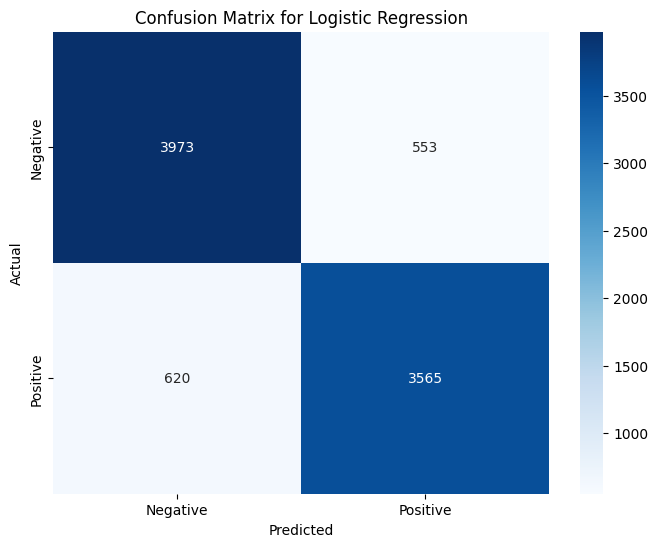


Example Predictions:

Text: Thank the lord!!!!
Predicted Sentiment: Positive
Actual Sentiment: Positive

Text: Hello @ Facebook this showed up on my feed recently. Kudos to you for finally doing some fact checks when people spread propaganda... My only suggestion is PLEASE make the fact check article more prominent! I don't think they notice! pic.twitter.com / s84tJkIJCk
Predicted Sentiment: Negative
Actual Sentiment: Positive

Text: As expected and reported months ago, it seems like  
Predicted Sentiment: Positive
Actual Sentiment: Positive

Text: @GhostRecon_UK on i ragequit<unk> after killing all the wolves and looking for the submarine after trying to get to this submarine my character stuck and falling in the air and i have I kill them once again for this monster, that place is his
Predicted Sentiment: Negative
Actual Sentiment: Negative

Text: Chinese App Ban in India Updates: Including PUBG and TikTok, Centre has so far banned 224 Chinese apps amid LAC tensions dlvr.it/Rfqtps
P

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
file_path = r'C:\Users\dell\Desktop\twitter.csv'
df = pd.read_csv(file_path)

TEXT_COLUMN = 'im getting on borderlands and i will murder you all ,'
SENTIMENT_COLUMN = 'Positive'

df = df.dropna(subset=[TEXT_COLUMN, SENTIMENT_COLUMN])

# Map sentiment to binary values, assuming 'Positive' or 'Negative' labels
df[SENTIMENT_COLUMN] = df[SENTIMENT_COLUMN].map({'Positive': 1, 'Negative': 0})
df = df.dropna(subset=[SENTIMENT_COLUMN])

X = df[TEXT_COLUMN]
y = df[SENTIMENT_COLUMN].astype(int)  # Ensure y is in integer format

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
model = LogisticRegression(max_iter=1000)  # Increased max_iter to ensure convergence
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

print("\nExample Predictions:")
for i in range(min(5, len(X_test))):
    print(f"\nText: {X_test.iloc[i]}")
    print(f"Predicted Sentiment: {'Positive' if y_pred[i] == 1 else 'Negative'}")
    print(f"Actual Sentiment: {'Positive' if y_test.iloc[i] == 1 else 'Negative'}")


In [4]:
print(df.columns)

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')
